In [2]:
import time
from collections import defaultdict

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

start = time.time()
df = pd.read_excel("/Users/enesdemir/Desktop/ProLab3/Data/PROLAB 3 - GÜNCEL DATASET.xlsx")
end = time.time()

n=Eleman sayısı
i=eleman indexi
NOT=Silinmeler rootdan yapılır.
Eklenmeler ise soldan.

In [6]:
def heapify(arr,n,i):
    smallest = i
    left = 2*i+1
    right = 2*i+2

    if left < n and arr[left][0] < arr[smallest][0] :
        smallest = left

    if right < n and arr[right][0]  < arr[smallest][0] :
        smallest = right

    if smallest != i:
        arr[smallest], arr[i] = arr[i], arr[smallest]

        heapify(arr,n,smallest)

def heapSort(arr,i,n):
    arr[i],arr[n-1]=arr[n-1],arr[i]

    heapify(arr,n-1,i)

def heapPop(arr,n,i):
    if n == 0:
        return None

    arr[i],arr[n-1]=arr[n-1],arr[i]

    heapify(arr,n-1,i)
    return arr.pop()

def heapPush(arr,n,val):
    arr.append(val)

    while n>0:
        parent = (n - 1) // 2
        if arr[n][0] < arr[parent][0]:
            arr[parent], arr[n] = arr[n], arr[parent]
            n = parent
        else:
            break


In [7]:
def dijkstra(graph, src, dest):
    history=[]
    import  sys
    inf=sys.maxsize
    node_Data={}
    for node in graph:
        node_Data[node]= {
            "cost" :inf,
            "path":[]
        }

    node_Data[src]["cost"]=0
    node_Data[src]["path"].append(src)

    min_heap=[]
    heapPush(min_heap,0,(0,src))

    visited_Nodes=set()

    while min_heap:
        history.append({k: {"cost": v["cost"], "path": v["path"].copy()} for k, v in node_Data.items()})
        current_cost, temp = min_heap[0]
        heapPop(min_heap, len(min_heap), 0)

        if temp == dest:
            return str(node_Data[dest]["cost"]), node_Data[dest]["path"],history

        if temp in visited_Nodes:
            continue


        visited_Nodes.add(temp)
        for j in graph[temp]:
            if  j not in visited_Nodes:
                cost=node_Data[temp]["cost"]+graph[temp][j]
                if cost < node_Data[j]["cost"]:
                    node_Data[j]["cost"]=cost
                    node_Data[j]["path"]=node_Data[temp]["path"] + [j]
                    heapPush(min_heap,len(min_heap),(cost,j))


    return "Yol yok", [],history


graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2},
    'E': {'C': 10, 'D': 2}
}
start=time.time()
maliyet, yol ,history= dijkstra(graph, 'A', 'C')
end=time.time()
for i, step in enumerate(history, 1):
    print(f"\nAdım {i}:")
    for node, data in step.items():
        print(f"{node}: Maliyet = {data['cost']}, Yol = {data['path']}")
print(f"En kısa yol maliyeti: {maliyet}")
print(f"Yol: {' -> '.join(yol)}")
print(end-start)


Adım 1:
A: Maliyet = 0, Yol = ['A']
B: Maliyet = 9223372036854775807, Yol = []
C: Maliyet = 9223372036854775807, Yol = []
D: Maliyet = 9223372036854775807, Yol = []
E: Maliyet = 9223372036854775807, Yol = []

Adım 2:
A: Maliyet = 0, Yol = ['A']
B: Maliyet = 4, Yol = ['A', 'B']
C: Maliyet = 2, Yol = ['A', 'C']
D: Maliyet = 9223372036854775807, Yol = []
E: Maliyet = 9223372036854775807, Yol = []
En kısa yol maliyeti: 2
Yol: A -> C
4.982948303222656e-05


In [8]:
def dfs_longest_path(graph, start_node, visited=None):
    if visited is None:
        visited = set()

    visited.add(start_node)
    max_path = [start_node]

    for neighbor in graph[start_node]:
        if neighbor not in visited:
            current_path = dfs_longest_path(graph, neighbor, visited.copy()) #Her yolı zaten kod aslında dönücek.Bu visited amacı sadece o yolda döngüye girmemesini sağlamak.

            candidate_path = [start_node] + current_path

            if len(candidate_path) > len(max_path):
                max_path = candidate_path

    return max_path


In [9]:
def en_cok_isbirligi_yapan_yazari_bul(graph):

    en_fazla_isbirligi = 0
    en_cok_isbirligi_yapan_yazar = None


    for yazar, ortak_yazarlar in graph.items():
        ortak_yazar_sayisi = len(ortak_yazarlar)


        if ortak_yazar_sayisi > en_fazla_isbirligi:
            en_fazla_isbirligi = ortak_yazar_sayisi
            en_cok_isbirligi_yapan_yazar = yazar

    return (en_cok_isbirligi_yapan_yazar, en_fazla_isbirligi)

In [10]:
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2},
    'E': {'C': 10, 'D': 2},
}


print(list(graph["A"].keys()))

current_path = dfs_longest_path(graph, 'A')
print(f"Longest path: {current_path}")
print(f"Path length: {len(current_path)}")

x,y=en_cok_isbirligi_yapan_yazari_bul(graph)
print("En çok iş birliği yapan yazar:{}  || İş birliği sayısı:{}".format(x,y))


['B', 'C']
Longest path: ['A', 'B', 'C', 'D', 'E']
Path length: 5
En çok iş birliği yapan yazar:C  || İş birliği sayısı:4


In [11]:
queue={
    "A":{
        "B": 4,
        "C": 2,
        "D": 5,
        "E": 10,
        "F": 7,
        "G": 3,
        "H": 11,
        "I": 9,
    }
}

priority_Queue=[]
for q in queue["A"]:
    heapPush(priority_Queue,len(priority_Queue),(queue["A"][q],q))

print(priority_Queue)
while priority_Queue:
    yazar,value=heapPop(priority_Queue,len(priority_Queue),0)
    print(f"yazar: {yazar}, value: {value}")

[(2, 'C'), (4, 'B'), (3, 'G'), (9, 'I'), (7, 'F'), (5, 'D'), (11, 'H'), (10, 'E')]
yazar: 2, value: C
yazar: 3, value: G
yazar: 4, value: B
yazar: 5, value: D
yazar: 7, value: F
yazar: 9, value: I
yazar: 10, value: E
yazar: 11, value: H


In [12]:
class Article:
    def __init__(self, doi, name, coauthors):
        self.doi = doi
        self.name = name
        self.coauthors = set(coauthors)  # Using set to prevent duplicate coauthors

In [13]:
class Author:
    def __init__(self, orcid, name):
        self.orcid = orcid
        self.name = name
        self.articles = set()  # Using set to prevent duplicate articles


In [14]:
def build_author_graph(df):
    orcid_to_author = {}
    name_to_author = {}
    collaboration_graph = defaultdict(lambda: defaultdict(int))

    for orcid, name in zip(df["orcid"], df["author_name"]):
        name = name.strip()
        orcid = orcid.strip()

        if orcid not in orcid_to_author:
            author = Author(orcid, name)
            orcid_to_author[orcid] = author
            name_to_author[name] = author #aynı adda olanlarda burada her eklenen nesne bir öncekini eziyor.

            collaboration_graph[author] = {}

    for row in df.itertuples():
        orcid = row.orcid.strip()
        main_author = orcid_to_author[orcid]

        coauthors = row.coauthors.strip('[]').replace("'", "").split(',')
        coauthors = [name.strip() for name in coauthors]

        if len(coauthors) > 1:
            coauthors.pop(row.author_position - 1)

        article = Article(row.doi, row.paper_title, coauthors)
        main_author.articles.add(article)

    for row in df.itertuples():
        orcid = row.orcid.strip()
        main_author = orcid_to_author[orcid]

        coauthors = row.coauthors.strip('[]').replace("'", "").split(',')
        coauthors = [name.strip() for name in coauthors]

        if len(coauthors) > 1:
            coauthors.pop(row.author_position - 1)

        # Collaboration graph'ı güncelle
        for coauthor_name in coauthors:
            if coauthor_name in name_to_author:
                coauthor = name_to_author[coauthor_name] ##en son olan nesneyi tutar o ad la.
                if coauthor.orcid != main_author.orcid:
                    collaboration_graph[main_author][coauthor] = collaboration_graph[main_author].get(coauthor, 0) + 1
                    collaboration_graph[coauthor][main_author] = collaboration_graph[coauthor].get(main_author, 0) + 1

    return orcid_to_author, name_to_author, collaboration_graph

In [15]:
def print_graph_statistics(orcid_to_author, collaboration_graph):
    print("\nGraph Statistics:")
    print(f"Total number of authors: {len(orcid_to_author)}")

    # Count isolated and connected authors
    isolated_authors = []
    connected_authors = []

    for orcid, author in orcid_to_author.items():
        collaborators = collaboration_graph[author]
        if collaborators:
            connected_authors.append(author)
        else:
            isolated_authors.append(author)

    print(f"Connected authors: {len(connected_authors)}")
    print(f"Isolated authors: {len(isolated_authors)}")
    print(collaboration_graph[orcid_to_author["0000-0003-2795-056X"]].values())
    # Print connected authors' statistics
    print("\nConnected Authors:")
    for author in connected_authors:
        collaborators = collaboration_graph[author]
        print(f"\nAuthor: {author.name} ({author.orcid})")
        print(f"Number of collaborators: {len(collaborators)}")
        for coauthor, weight in collaborators.items():
            print(f"  - {coauthor.name}: {weight} collaboration(s) id:{coauthor.orcid} ")

    # Print isolated authors
    print("\nIsolated Authors:")
    for author in isolated_authors:
        print(f"- {author.name} ({author.orcid})")


In [16]:

def visualize_graph(collaboration_graph, title="Collaboration Network"):
    # Create NetworkX graph
    G = nx.Graph()  # Undirected graph since collaborations are bidirectional

    # Add all authors as nodes with unique identifiers
    for author in collaboration_graph.keys():
        # Create a unique identifier by combining last name, first name initial, and ORCID
        author_label = f"{author.name.split()[0][0]}_{author.name.split()[-1]}_{author.orcid}"
        G.add_node(author_label,
                   full_name=author.name,
                   orcid=author.orcid,
                   is_connected=len(collaboration_graph[author]) > 0)

    # Add edges with weights
    for author, collaborators in collaboration_graph.items():
        author_label = f"{author.name.split()[0][0]}_{author.name.split()[-1]}_{author.orcid}"
        for collaborator, weight in collaborators.items():
            collab_label = f"{collaborator.name.split()[0][0]}_{collaborator.name.split()[-1]}_{collaborator.orcid}"
            G.add_edge(author_label, collab_label, weight=weight)

    # Separate isolated and connected nodes
    isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
    connected_nodes = [node for node in G.nodes() if G.degree(node) > 0]

    # Calculate edge widths based on weights
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    edge_widths = [2 * w/max_weight for w in edge_weights]

    # Significantly larger figure to accommodate more nodes
    plt.figure(figsize=(30, 20), dpi=300)

    # Use different layout strategies
    pos = nx.spring_layout(G, k=1, iterations=200, seed=42)

    # Draw nodes with size based on connection
    nx.draw_networkx_nodes(G, pos,
                           nodelist=connected_nodes,
                           node_color='lightblue',
                           node_size=500,
                           alpha=0.7)

    nx.draw_networkx_nodes(G, pos,
                           nodelist=isolated_nodes,
                           node_color='lightcoral',
                           node_size=300,
                           alpha=0.5)

    # Draw edges
    nx.draw_networkx_edges(G, pos,
                           edge_color='gray',
                           width=edge_widths,
                           alpha=0.3)

    # Create custom labels showing first initial, last name
    labels = {node: f"{node.split('_')[0]}.{node.split('_')[1]}" for node in G.nodes()}

    # Draw labels with very small font
    nx.draw_networkx_labels(G, pos,
                            labels=labels,
                            font_size=6,
                            font_color='darkblue',
                            font_weight='bold')

    plt.title(title, fontsize=20, pad=20)
    plt.axis('off')

    # Customize legend
    blue_patch = plt.plot([], [], 'o', color='lightblue', label='Connected Authors')[0]
    red_patch = plt.plot([], [], 'o', color='lightcoral', label='Isolated Authors')[0]
    plt.legend(handles=[blue_patch, red_patch], loc='best', fontsize=10)

    return G, plt

# Not forgetting to set matplotlib to use tight layout
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [5]:

class Node:
    def __init__(self, author, collaborators=None):
        self.author = author
        self.collaborators = collaborators if collaborators else {}
        self.left = None
        self.right = None

class Ister3:
    def __init__(self):
        self.root = None

    def insert(self, author, collaborators):
        """Insert an author into the BST, using ORCID as the key"""
        if not self.root:
            self.root = Node(author, collaborators)
        else:
            self._insert_recursive(self.root, author, collaborators)

    def _insert_recursive(self, node, author, collaborators):
        if author.orcid < node.author.orcid:
            if node.left is None:
                node.left = Node(author, collaborators)
            else:
                self._insert_recursive(node.left, author, collaborators)
        elif author.orcid > node.author.orcid:
            if node.right is None:
                node.right = Node(author, collaborators)
            else:
                self._insert_recursive(node.right, author, collaborators)

    def find_author(self, orcid):
        """Find author by ORCID"""
        return self._find_recursive(self.root, orcid)

    def _find_recursive(self, node, orcid):
        if node is None or node.author.orcid == orcid:
            return node
        if orcid < node.author.orcid:
            return self._find_recursive(node.left, orcid)
        return self._find_recursive(node.right, orcid)

    def build_from_graph(self):
        """Build BST using collaboration data from Graph class"""
        # First get the collaboration graph from Graph class
        orcid_to_author, name_to_author, collaboration_graph = build_author_graph(df)

        # Insert each author and their collaborators into BST
        for author, collaborators in collaboration_graph.items():
            self.insert(author, collaborators)

    def print_bst_statistics(self):
        """Print statistics about the BST structure"""
        print("\nBST Statistics:")

        def count_nodes(node):
            if not node:
                return 0
            return 1 + count_nodes(node.left) + count_nodes(node.right)

        total_authors = count_nodes(self.root)
        print(f"Total number of authors in BST: {total_authors}")

        def print_author_details(node):
            if node:
                print(f"\nAuthor: {node.author.name} ({node.author.orcid})")
                print(f"Number of collaborators: {len(node.collaborators)}")
                for coauthor, weight in node.collaborators.items():
                    print(f"  - {coauthor.name}: {weight} collaboration(s)")
                print_author_details(node.left)
                print_author_details(node.right)

        print("\nAuthor Details (In-order traversal):")
        print_author_details(self.root)

    def inorder_traversal(self):
        """Perform inorder traversal of the BST"""
        result = []
        def _inorder(node):
            if node:
                _inorder(node.left)
                result.append(node.author)
                _inorder(node.right)
        _inorder(self.root)
        return result

    def get_author_collaborations(self, orcid):
        """Get collaborations for a specific author"""
        node = self.find_author(orcid)
        if node:
            return node.collaborators
        return None

if __name__ == "__main__":
    # Create BST instance
    bst = Ister3()

    # Build BST using collaboration graph
    bst.build_from_graph()

    # Print BST statistics
    bst.print_bst_statistics()

    # Example: Find specific author's collaborations
    # Replace with actual ORCID
    sample_orcid = "sample_orcid"
    collaborations = bst.get_author_collaborations(sample_orcid)
    if collaborations:
        print(f"\nCollaborations for author with ORCID {sample_orcid}:")
        for coauthor, count in collaborations.items():
            print(f"- {coauthor.name}: {count} collaboration(s)")

NameError: name 'build_author_graph' is not defined


Graph Statistics:
Total number of authors: 134
Connected authors: 28
Isolated authors: 106
dict_values([])

Connected Authors:

Author: Rajan Choudhary (0000-0003-0901-5076)
Number of collaborators: 1
  - Rajesh Kumar: 1 collaboration(s) id:0000-0003-2671-6552 

Author: Rajarshi Roy (0000-0002-2381-829X)
Number of collaborators: 1
  - Rajarshi Roy: 1 collaboration(s) id:0000-0002-5788-9424 

Author: Rajarshi Roy (0000-0002-5788-9424)
Number of collaborators: 1
  - Rajarshi Roy: 1 collaboration(s) id:0000-0002-2381-829X 

Author: Dr.Rajat Gupta (0000-0002-9907-5795)
Number of collaborators: 1
  - Rajeev Pandey: 1 collaboration(s) id:0000-0002-1890-8389 

Author: Rajat Gupta (0000-0002-9100-5610)
Number of collaborators: 1
  - Rajeev Pandey: 2 collaboration(s) id:0000-0002-1890-8389 

Author: Rajeev Agrawal (0000-0002-5415-5230)
Number of collaborators: 1
  - Rajeev Agrawal: 1 collaboration(s) id:0000-0001-9158-8329 

Author: Rajeev Agrawal (0000-0001-9158-8329)
Number of collaborators:

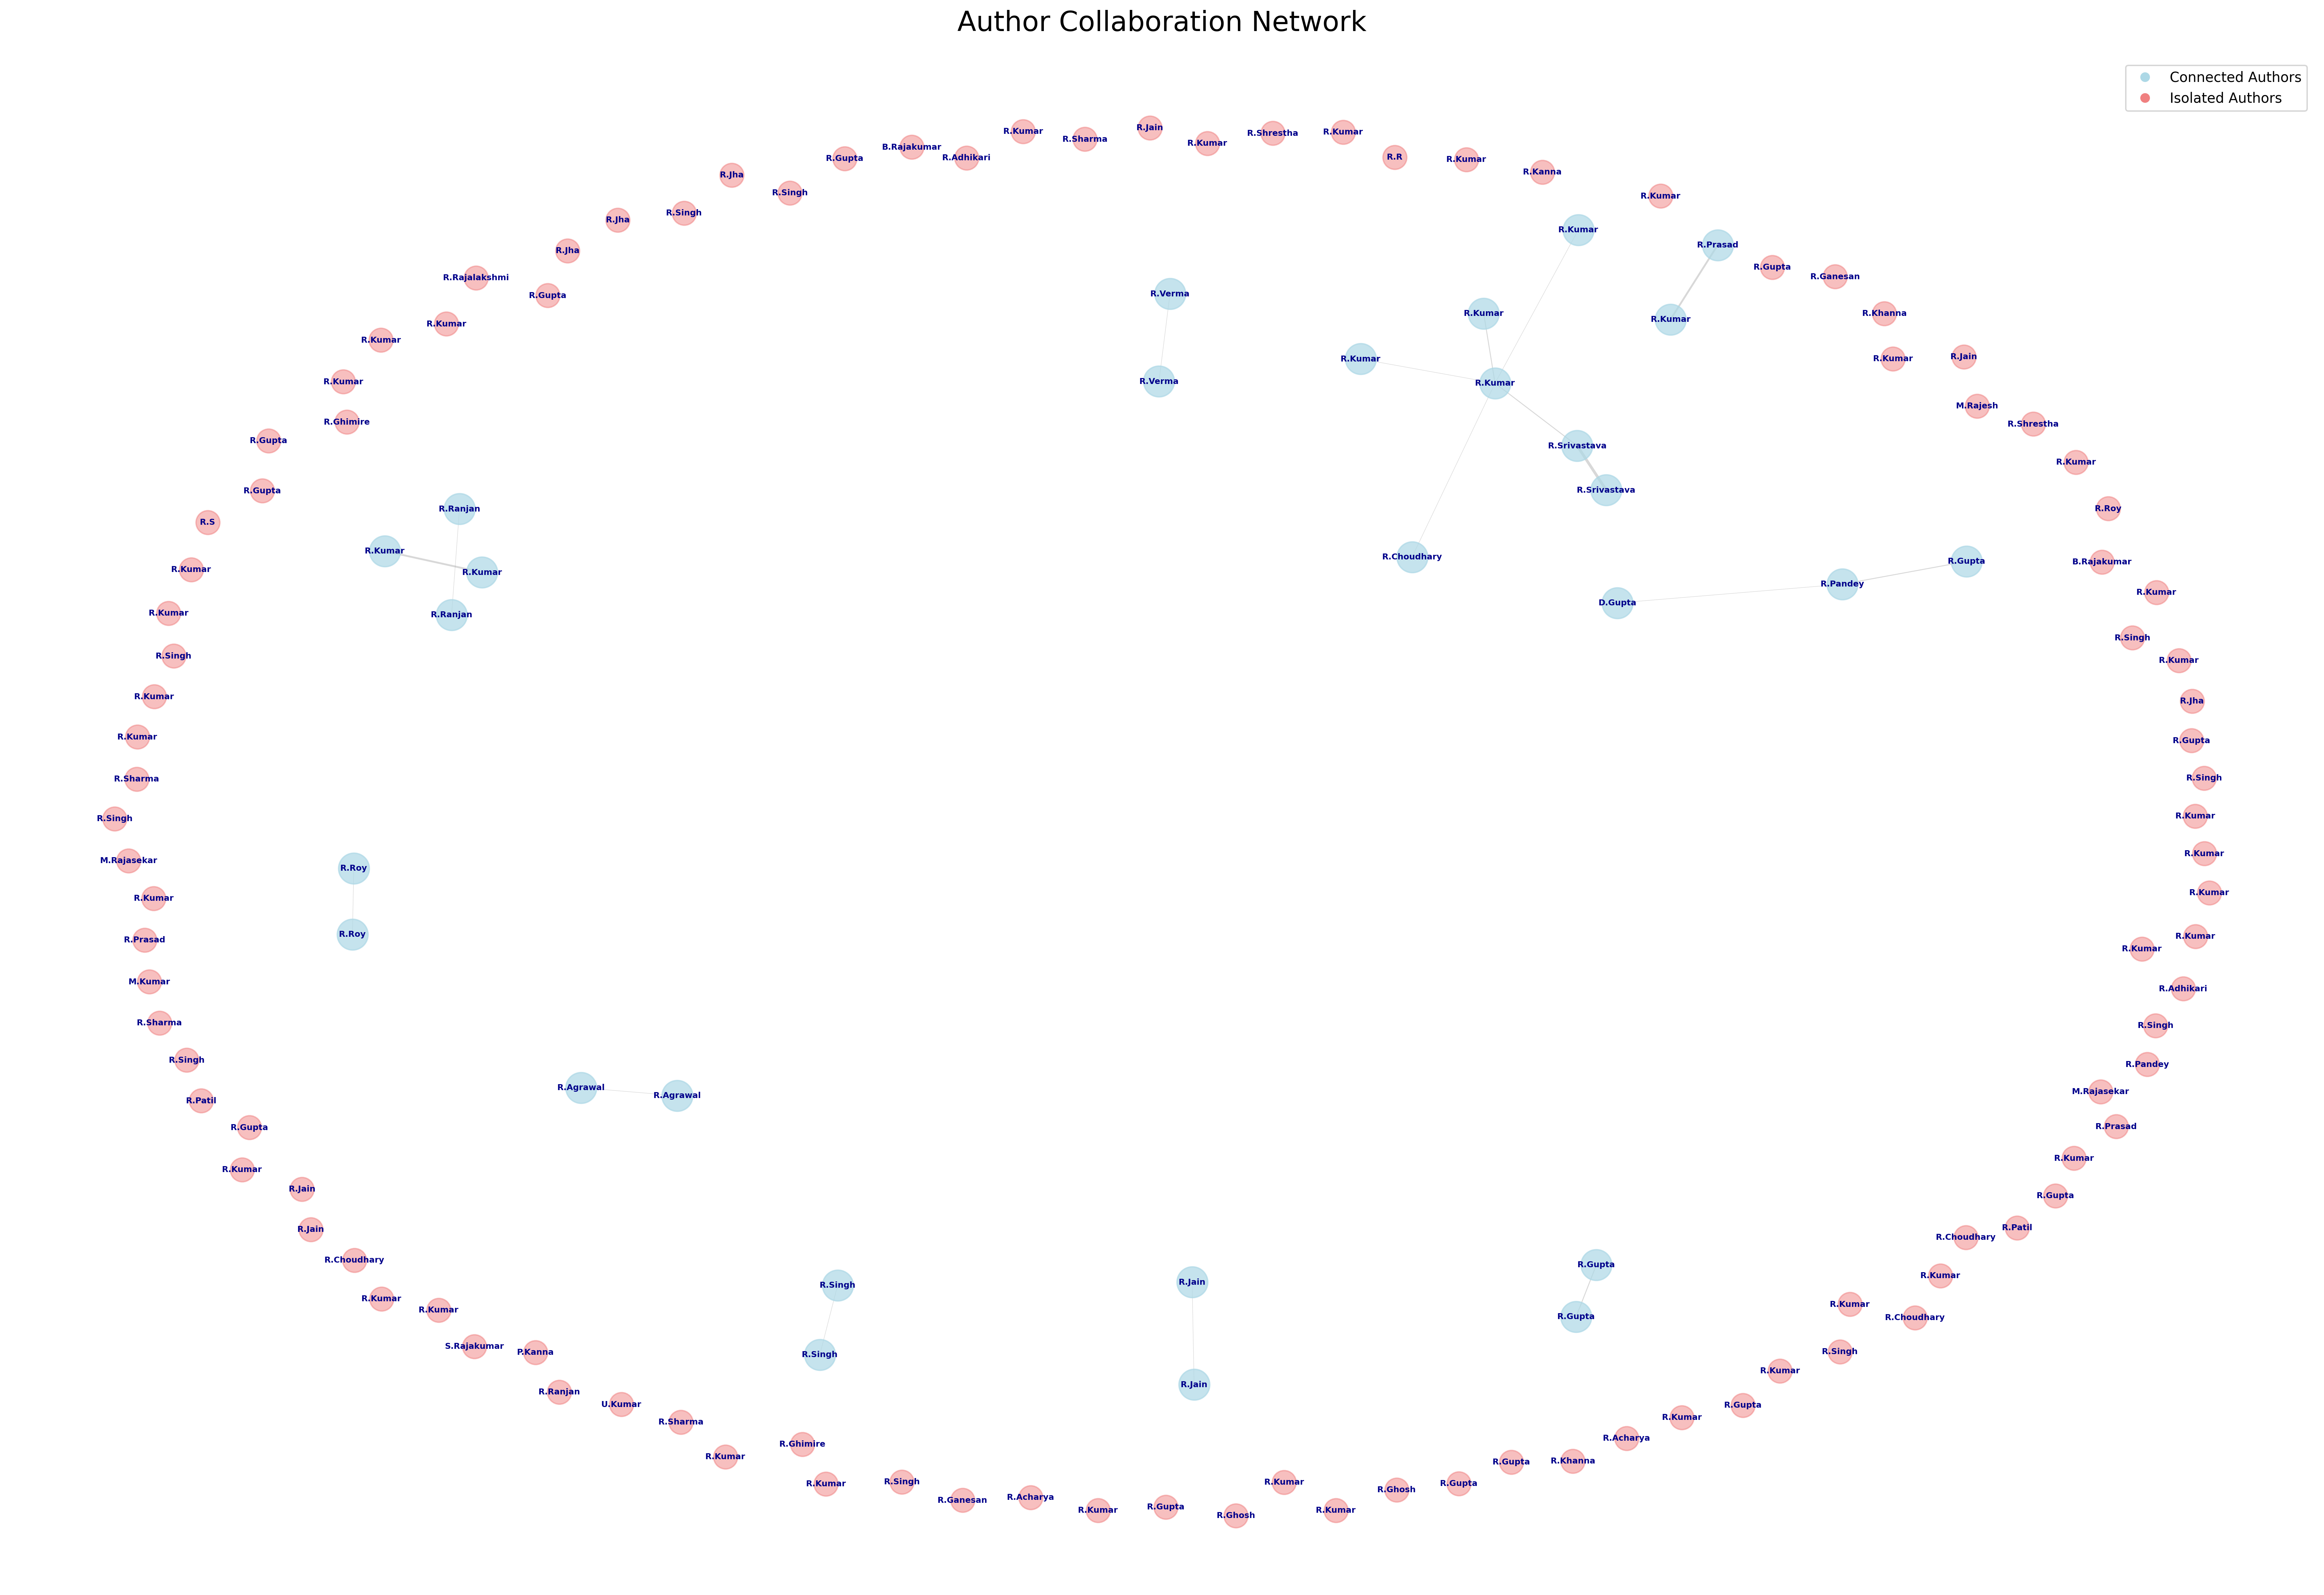

In [71]:
if __name__ == "__main__":
    orcid_to_author, name_to_author, collaboration_graph = build_author_graph(df)
    print_graph_statistics(orcid_to_author, collaboration_graph)

    G, plt = visualize_graph(collaboration_graph, "Author Collaboration Network")
    plt.show()